### Loan Application Status Prediction  

#### Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:  
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


#### Dataset Link-    
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [162]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### #Data Gathering

In [163]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### #Data Pre-processing

In [164]:
data.shape

(614, 13)

#### Rows : 614, Columns : 13

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Object columns : 8   
#### int64 columns  : 1
#### float64 columns : 4

#### Looking at the Unwanted column 'Loan_ID'

In [166]:
data['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

#### column 'Loan_ID' is just an identifier of the borrower, hence this is not adding any value to dataset. Hence Droping this column.

In [167]:
data=data.drop(['Loan_ID'], axis=1)

In [168]:
data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
490,Male,No,0,Not Graduate,No,2699,2785.0,96.0,360.0,NaN,Semiurban,Y
57,Male,Yes,0,Graduate,No,3366,2200.0,135.0,360.0,1.0,Rural,N
181,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural,N
563,Male,No,0,Not Graduate,Yes,5800,0.0,132.0,360.0,1.0,Semiurban,Y
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
192,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,N
483,Male,Yes,0,Graduate,No,10833,0.0,234.0,360.0,1.0,Semiurban,Y
502,Male,Yes,2,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban,Y
388,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban,Y


#### Getting null values in dataset

In [169]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### So we have null values in our dataset

#### #Checking for white spaces , '-' and 'NA' values

In [170]:
data.isin([' ','NA','-']).sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Observation: NO white spaces or 'NA' or '-' values in dataset

#### #Treating Null values

In [171]:
#checking for value counts in each column
for column in data:
    print(data[column].value_counts(),'\n\n')

Male      489
Female    112
Name: Gender, dtype: int64 


Yes    398
No     213
Name: Married, dtype: int64 


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 


Graduate        480
Not Graduate    134
Name: Education, dtype: int64 


No     500
Yes     82
Name: Self_Employed, dtype: int64 


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64 


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64 


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64 


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name

#### Observations:
1. Columns having Categorical data: 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term', 'Property_Area' and 'Loan_Status'
2. Columns having Conitions data : 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount'

#### For catagorical values in column we will replace the  ' NaN 'values with the Mode of the column, but here we can not take mode directly as the column are containing object data type. hence need to replace the data manually with the Max occuring value

In [172]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [173]:
data['Gender'].fillna('Male', inplace=True)

In [174]:
data['Gender'].isnull().sum()

0

In [175]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [176]:
data['Married'].fillna('Yes', inplace=True)

In [177]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [178]:
data['Dependents'].fillna('0', inplace=True)

In [179]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [180]:
data['Self_Employed'].fillna('No', inplace=True)

In [181]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [182]:
data['Credit_History'].fillna(1.0, inplace=True)

In [183]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### Now as the columns 'LoanAmount' is the most important column of this dataset as the decision is being taken to give this amount as Loan or not.
#### Secondly the column 'Loan_Amount_Term' is also the important column of this data set as this loan is bein given for this much tenure. 
#### So we are dropping NaN values of these two columns

In [184]:
data=data.dropna()

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             578 non-null    object 
 1   Married            578 non-null    object 
 2   Dependents         578 non-null    object 
 3   Education          578 non-null    object 
 4   Self_Employed      578 non-null    object 
 5   ApplicantIncome    578 non-null    int64  
 6   CoapplicantIncome  578 non-null    float64
 7   LoanAmount         578 non-null    float64
 8   Loan_Amount_Term   578 non-null    float64
 9   Credit_History     578 non-null    float64
 10  Property_Area      578 non-null    object 
 11  Loan_Status        578 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 58.7+ KB


#### After droping the NaN values we have:
columns = 578  
rows = 12

#### # Encoding the Object datatype

In [186]:
from sklearn.preprocessing import LabelEncoder

In [187]:
lab=LabelEncoder()

In [188]:
df=lab.fit_transform(data['Gender'])
pd.Series(df)
data['Gender']=df

df=lab.fit_transform(data['Married'])
pd.Series(df)
data['Married']=df

df=lab.fit_transform(data['Dependents'])
pd.Series(df)
data['Dependents']=df

df=lab.fit_transform(data['Education'])
pd.Series(df)
data['Education']=df

df=lab.fit_transform(data['Self_Employed'])
pd.Series(df)
data['Self_Employed']=df

df=lab.fit_transform(data['Property_Area'])
pd.Series(df)
data['Property_Area']=df

df=lab.fit_transform(data['Loan_Status'])
pd.Series(df)
data['Loan_Status']=df



In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             578 non-null    int32  
 1   Married            578 non-null    int32  
 2   Dependents         578 non-null    int32  
 3   Education          578 non-null    int32  
 4   Self_Employed      578 non-null    int32  
 5   ApplicantIncome    578 non-null    int64  
 6   CoapplicantIncome  578 non-null    float64
 7   LoanAmount         578 non-null    float64
 8   Loan_Amount_Term   578 non-null    float64
 9   Credit_History     578 non-null    float64
 10  Property_Area      578 non-null    int32  
 11  Loan_Status        578 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 42.9 KB


In [190]:
data['Gender']=data['Gender'].astype(float)
data['Married']=data['Married'].astype(float)
data['Dependents']=data['Dependents'].astype(float)
data['Education']=data['Education'].astype(float)
data['Self_Employed']=data['Self_Employed'].astype(float)
data['ApplicantIncome']=data['ApplicantIncome'].astype(float)
data['Property_Area']=data['Property_Area'].astype(float)
data['Loan_Status']=data['Loan_Status'].astype(float)


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             578 non-null    float64
 1   Married            578 non-null    float64
 2   Dependents         578 non-null    float64
 3   Education          578 non-null    float64
 4   Self_Employed      578 non-null    float64
 5   ApplicantIncome    578 non-null    float64
 6   CoapplicantIncome  578 non-null    float64
 7   LoanAmount         578 non-null    float64
 8   Loan_Amount_Term   578 non-null    float64
 9   Credit_History     578 non-null    float64
 10  Property_Area      578 non-null    float64
 11  Loan_Status        578 non-null    float64
dtypes: float64(12)
memory usage: 58.7 KB


#### All the data is converted to dtype as 'Float64'

In [192]:
data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
170,1.0,1.0,0.0,1.0,0.0,1820.0,1769.0,95.0,360.0,1.0,0.0,1.0
344,1.0,1.0,2.0,0.0,0.0,2583.0,2330.0,125.0,360.0,1.0,0.0,1.0
269,0.0,0.0,1.0,0.0,0.0,2876.0,1560.0,90.0,360.0,1.0,2.0,1.0
161,1.0,1.0,0.0,0.0,0.0,7933.0,0.0,275.0,360.0,1.0,2.0,0.0
582,0.0,1.0,0.0,0.0,0.0,3166.0,0.0,36.0,360.0,1.0,1.0,1.0
425,1.0,1.0,0.0,0.0,0.0,2666.0,4300.0,121.0,360.0,1.0,0.0,1.0
279,0.0,1.0,0.0,1.0,0.0,4100.0,0.0,124.0,360.0,1.0,0.0,1.0
536,1.0,1.0,0.0,0.0,0.0,6133.0,3906.0,324.0,360.0,1.0,2.0,1.0
233,0.0,0.0,0.0,0.0,0.0,8333.0,0.0,280.0,360.0,1.0,1.0,1.0
257,1.0,1.0,3.0,0.0,0.0,5250.0,0.0,94.0,360.0,1.0,2.0,0.0


### # EDA

#### Looking for basis stats

In [193]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,0.816609,0.652249,0.756055,0.209343,0.133218,5435.138408,1640.482561,147.143599,342.145329,0.863322,1.025952,0.697232
std,0.387322,0.476669,1.011720,0.407192,0.340105,6229.382997,2993.270767,86.342523,65.442101,0.343805,0.781736,0.459854
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2890.250000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1211.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2281.000000,168.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


#### Observations:
1. Most of the columns in our dataset are having categorical values so basic stats are not applicable with these columns
2. looking at the columns with Continious values like 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' we have below observations:  
    a). The data seems to be skewed as mean and 50% values are not similar or near  
    b). The Max value are very high compared to 75% values  
    c). Std seems to be on higher side  

#### # Count plot

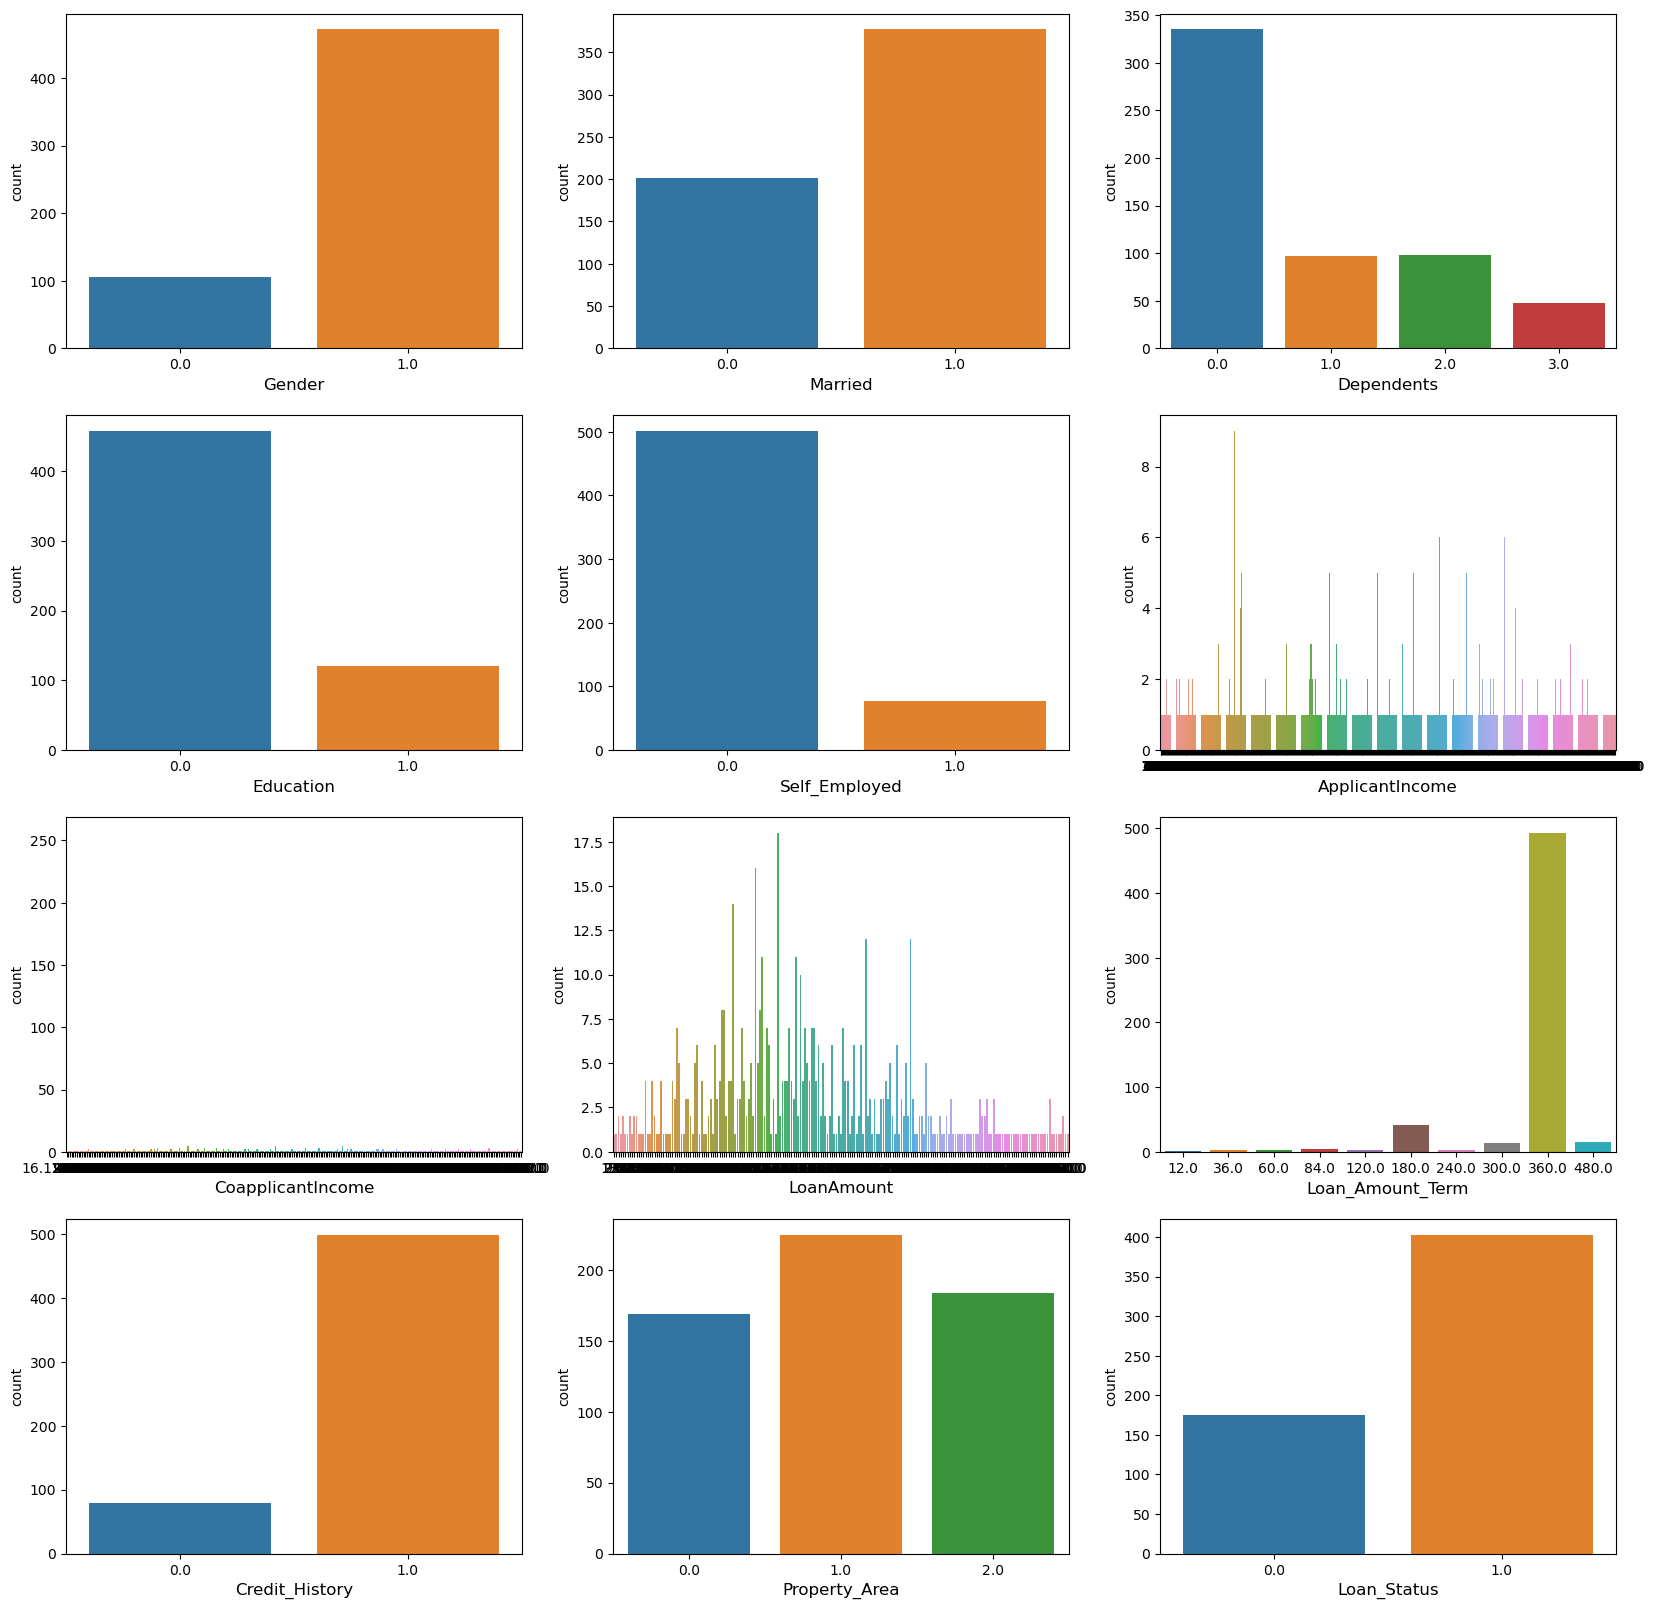

In [194]:
plt.figure(figsize=(20,20))
pltno=1
for column in data:
    if pltno<=12:
        plt.subplot(4,3,pltno)
        sns.countplot(data[column] )
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### # Distplot

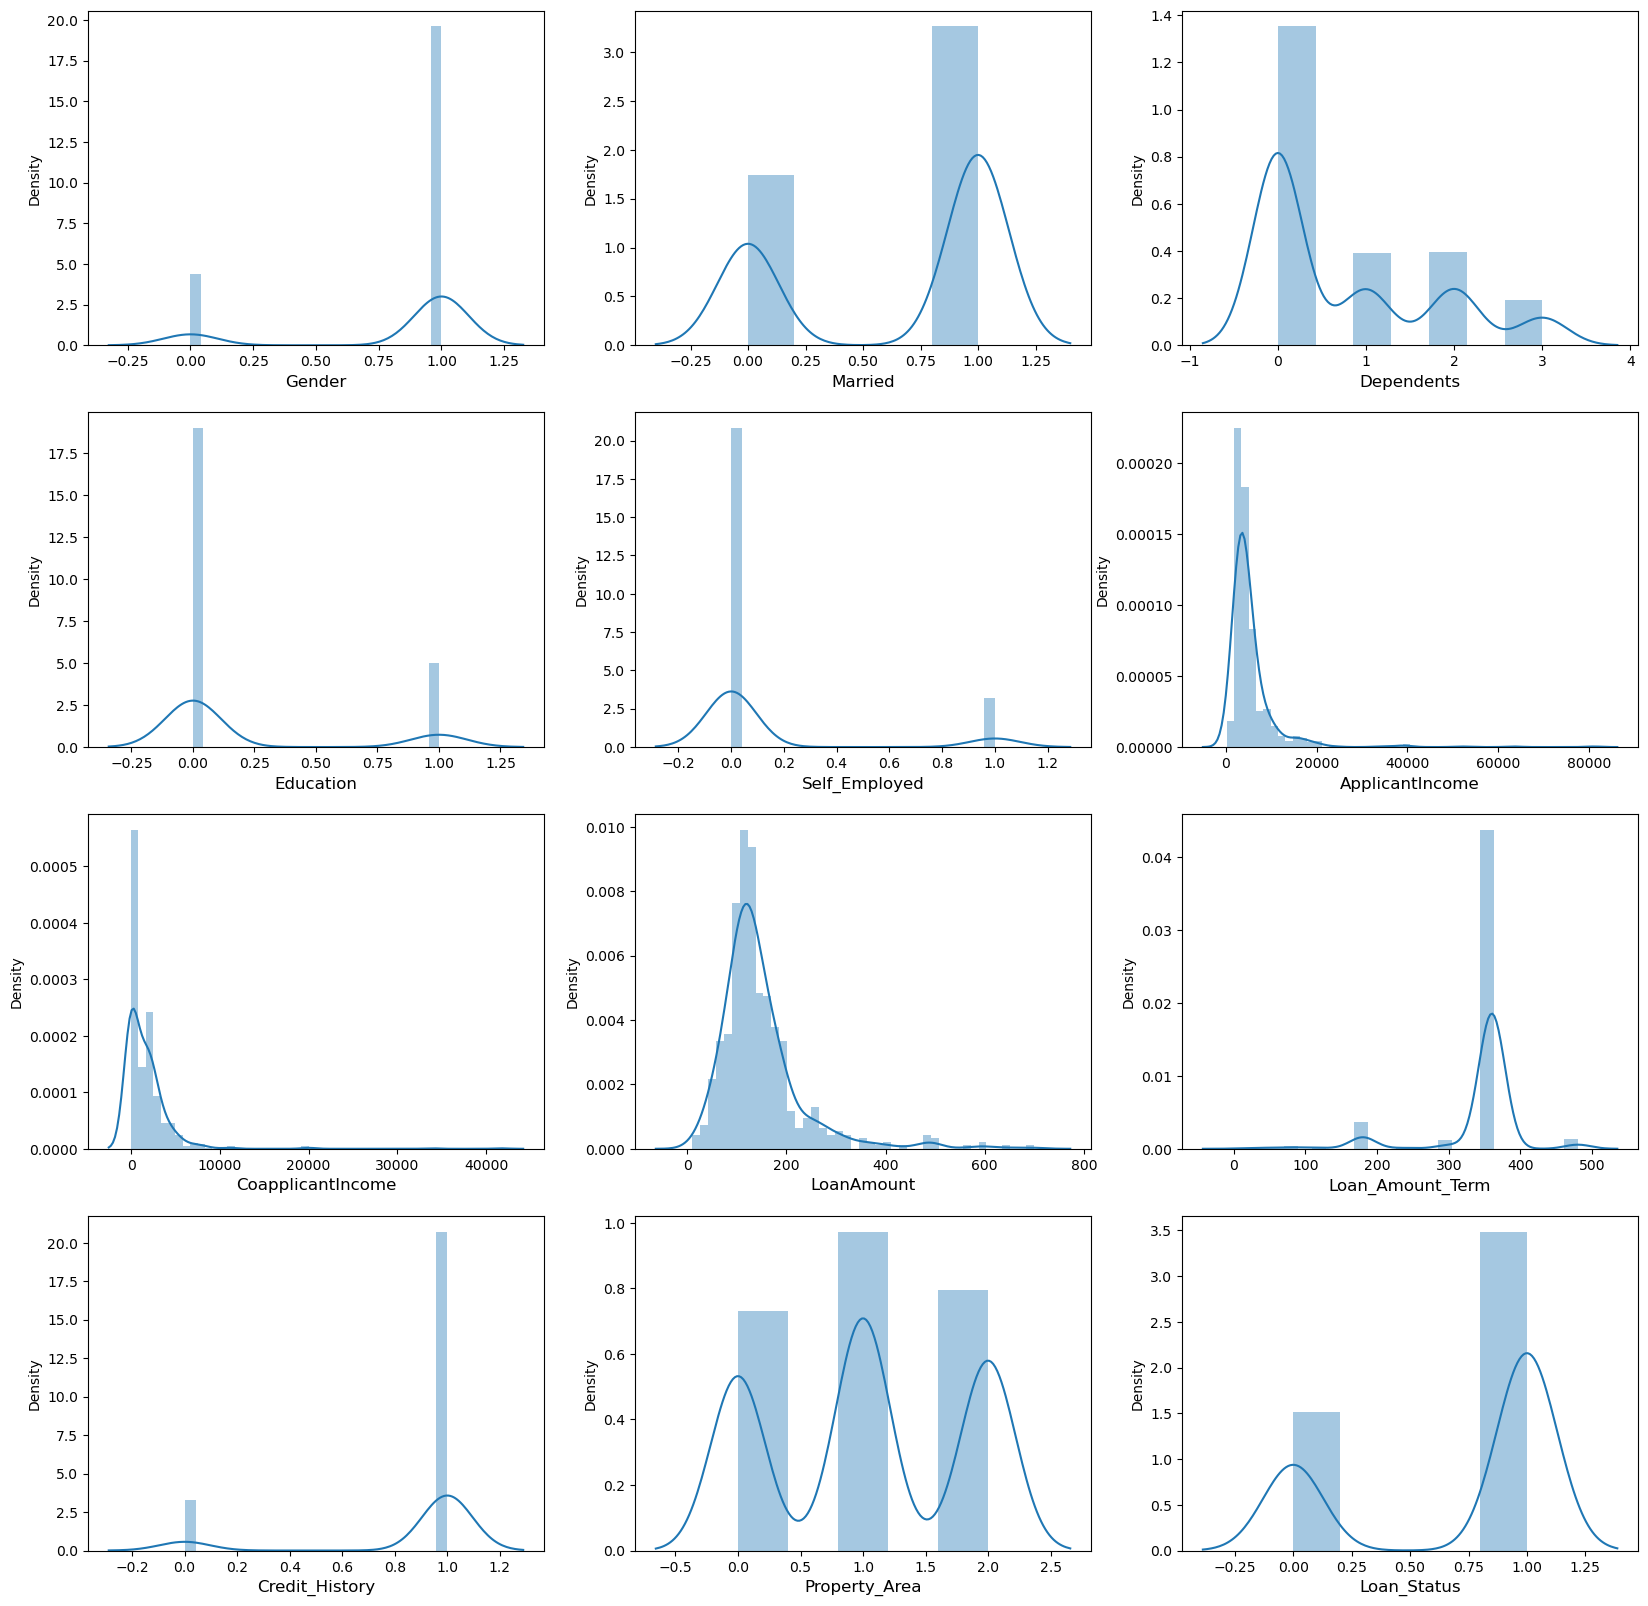

In [195]:
plt.figure(figsize=(20,20))
pltno=1
for column in data:
    if pltno<=12:
        plt.subplot(4,3,pltno)
        sns.distplot(data[column] )
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Observations:
1. skewness on Right side seen for the columns - 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'
2. skewness for other columns can be ignored as they contains categorical data


#### # Box plot

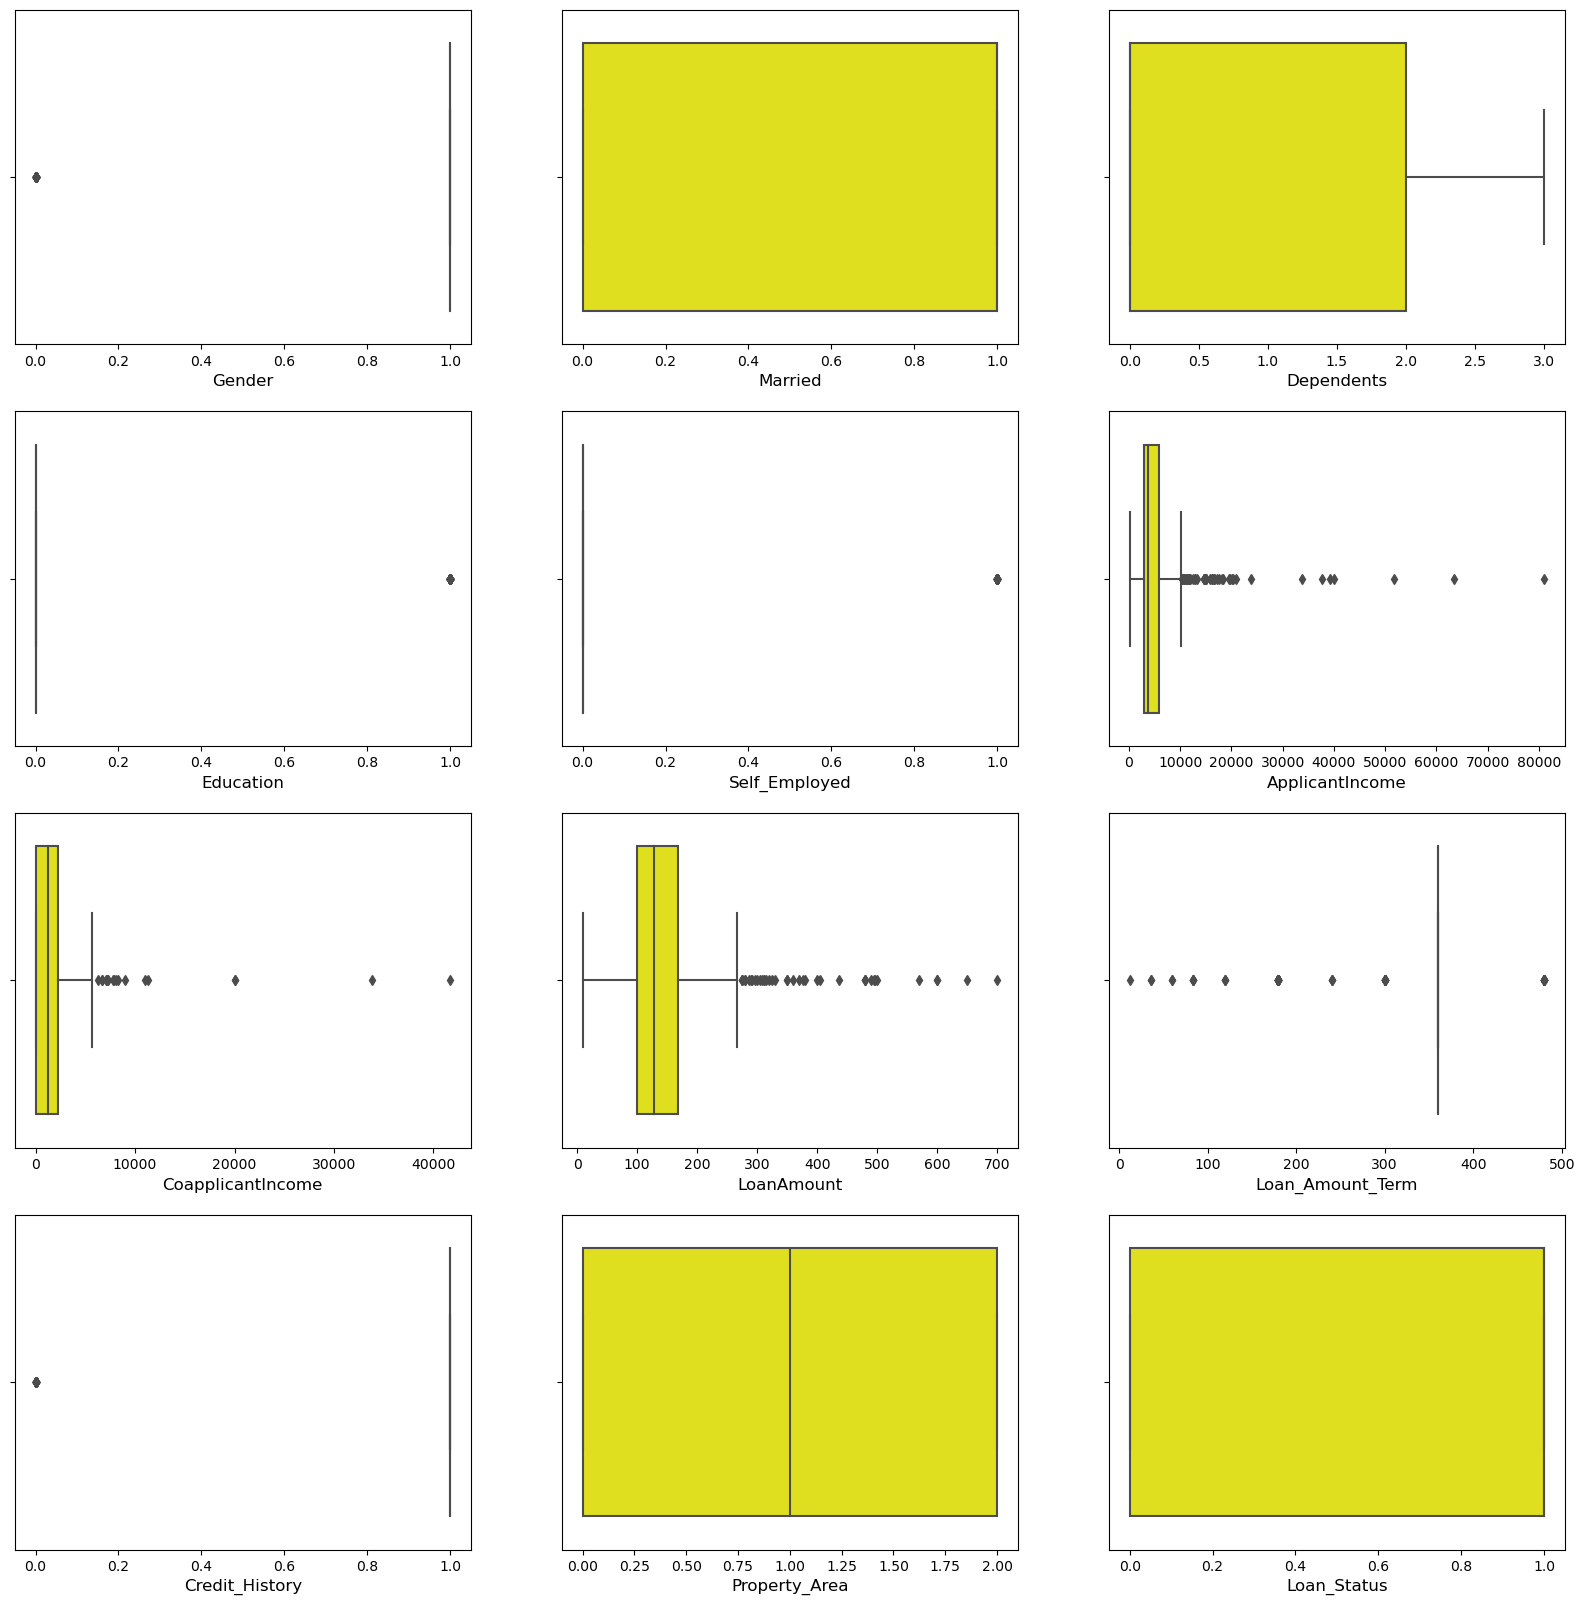

In [196]:
plt.figure(figsize=(20,20))
pltno=1
for column in data:
    if pltno<=12:
        plt.subplot(4,3,pltno)
        sns.boxplot(data[column], color='yellow' )
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Observations:
1. Outliers on Max side for columns - 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'
2. Outliers on Min side for columns - 'Gender', 'Credit_History'
3. Outliers on Both side for columns - 'Loan_Amount_Term'


#### #Treating Skewness

In [197]:
data.skew()

Gender              -1.640539
Married             -0.641023
Dependents           0.986828
Education            1.432577
Self_Employed        2.164367
ApplicantIncome      6.511168
CoapplicantIncome    7.418367
LoanAmount           2.649577
Loan_Amount_Term    -2.364832
Credit_History      -2.120874
Property_Area       -0.045369
Loan_Status         -0.860781
dtype: float64

#### Observations:
1. data is skewed on Right side for columns - 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount'
2. data is skewed on Left side for columns - 'Gender', 'Loan_Amount_Term', 'Credit_History',

#### # using z-score method to remove skewness and outliers

In [198]:
# Z score method 
from scipy import stats

data1=data

comp=pd.DataFrame()
z = abs(stats.zscore(data1))


data1 = data1[(z < 3).all(axis=1)]

comp['new'] = data1.skew()
comp['old'] = data.skew()
print(data1.shape)
comp


(544, 12)


,new,old
Gender,-1.621301,-1.640539
Married,-0.625621,-0.641023
Dependents,1.014150,0.986828
Education,1.377542,1.432577
Self_Employed,2.248820,2.164367
ApplicantIncome,2.259353,6.511168
CoapplicantIncome,1.383481,7.418367
LoanAmount,1.294999,2.649577
Loan_Amount_Term,-2.059628,-2.364832
Credit_History,-2.084282,-2.120874


In [199]:
data=data1

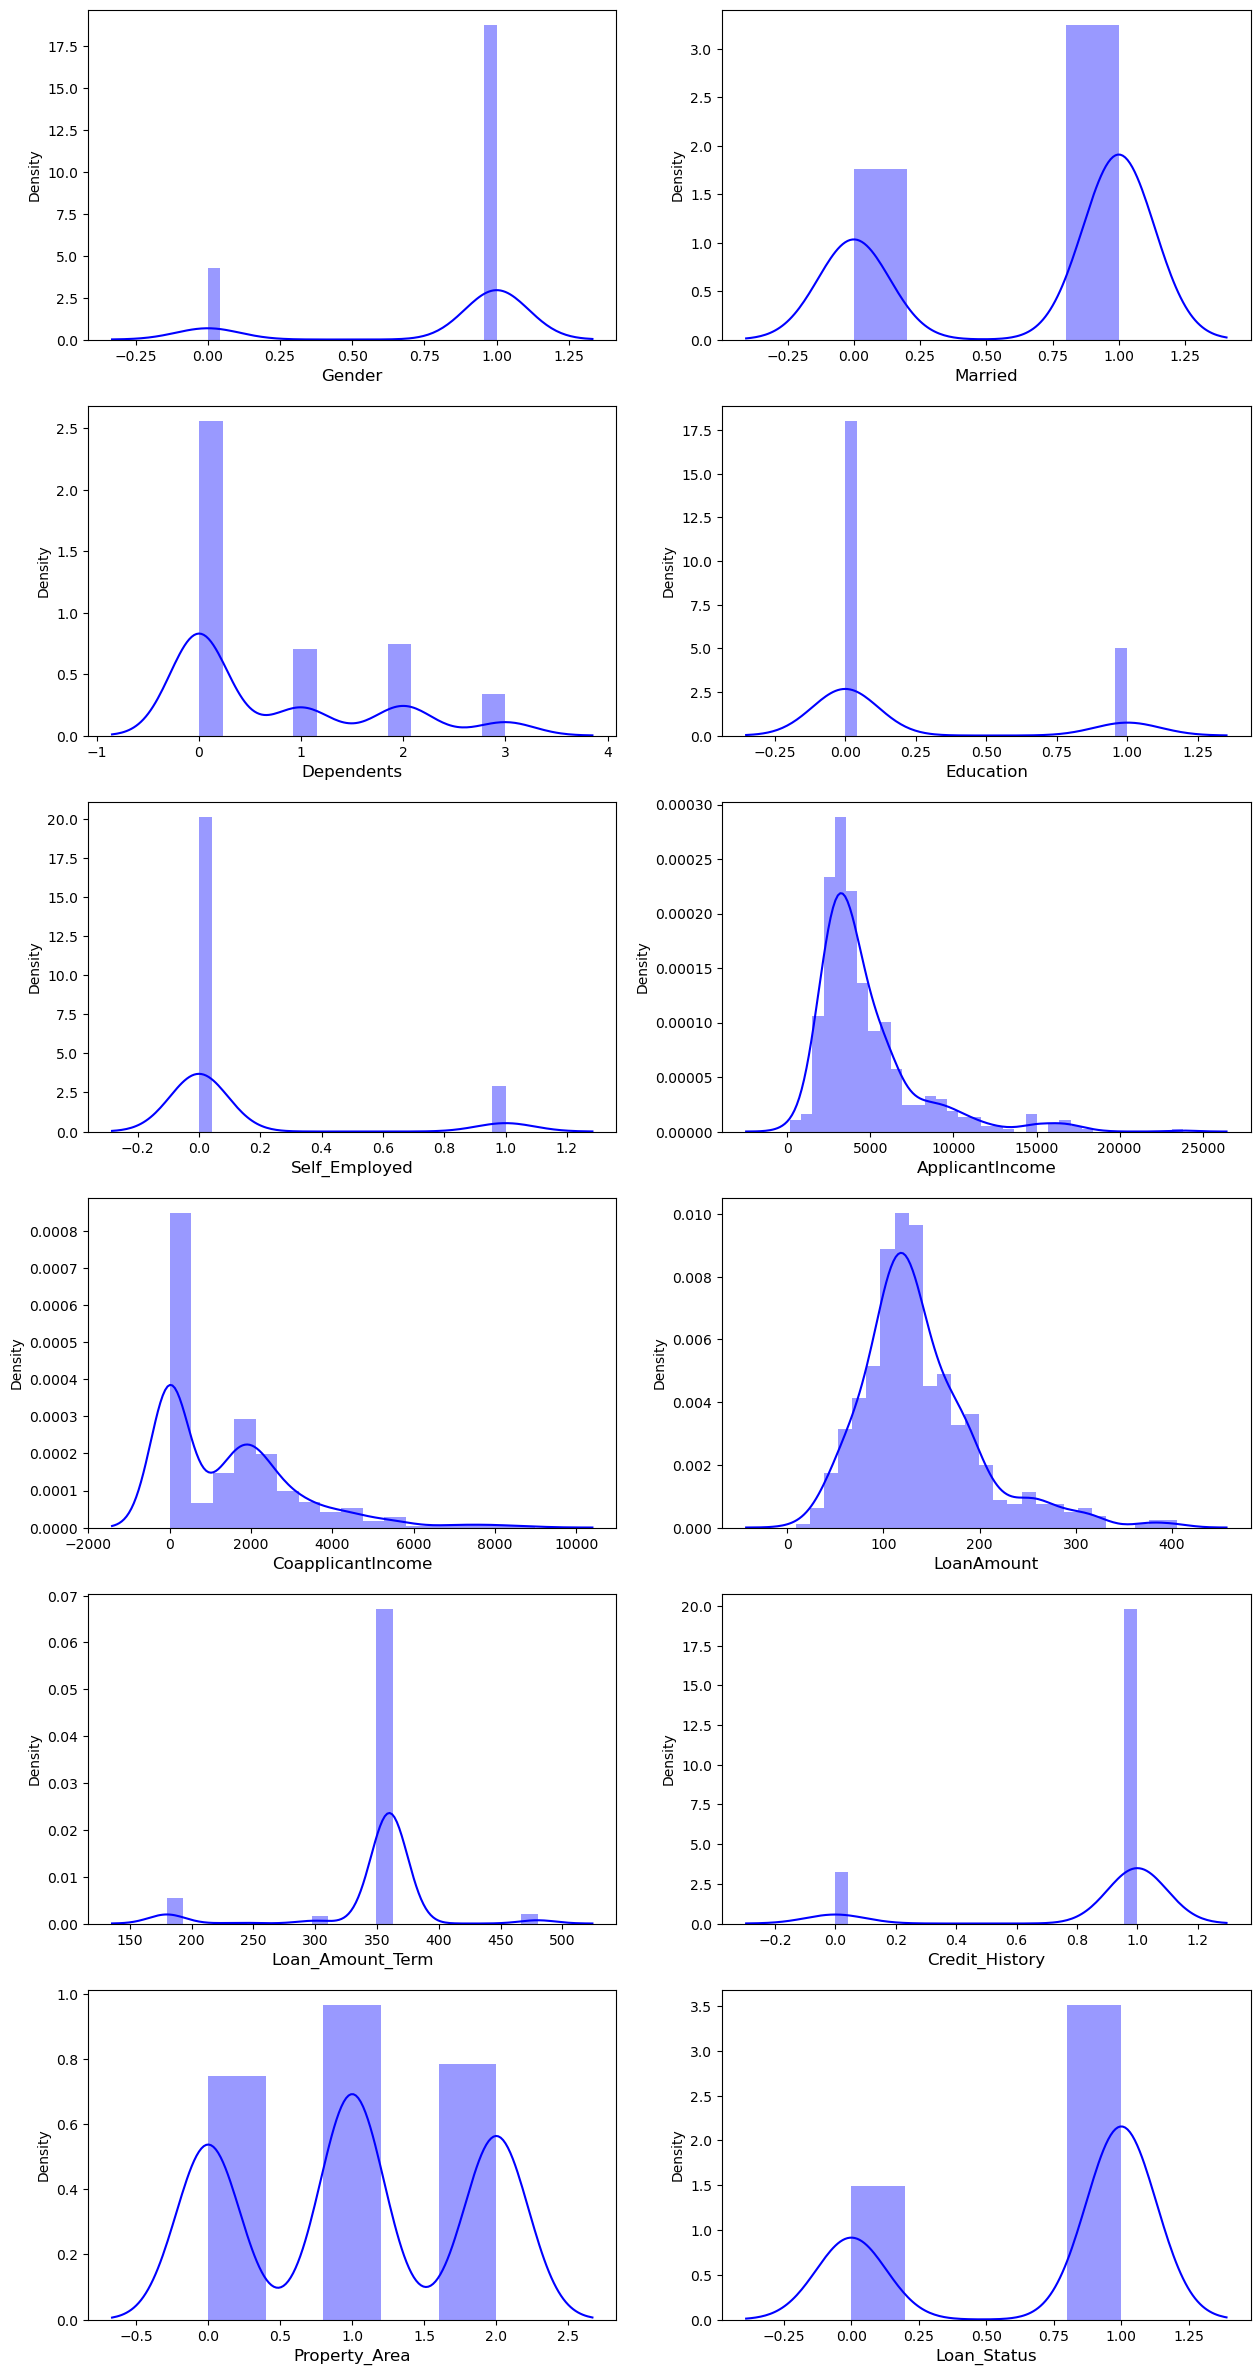

In [200]:
plt.figure(figsize=(15,30))
pltno=1
for column in data:
    if pltno<=12:
        plt.subplot(6,2,pltno)
        sns.distplot(data1[column], color='blue')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Better in shape now

In [201]:
data1.shape

(544, 12)

### # Multi-corelation heatmap

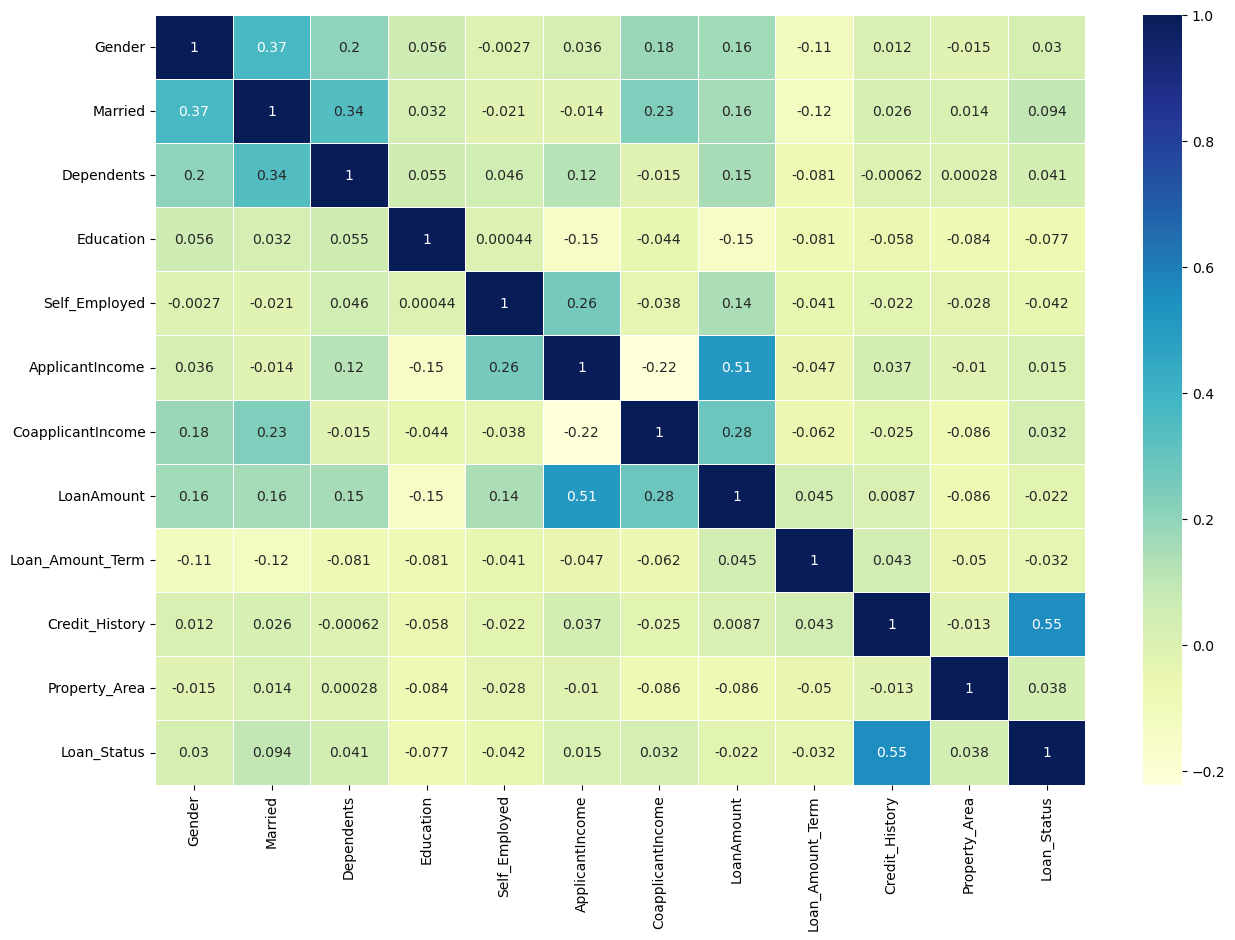

In [202]:
plt.subplots(figsize=(15,10))
sns.heatmap(data1.corr(),cmap='YlGnBu',annot=True, linewidth=.5)
plt.show()

#### # Observation:
1. No Multi co-linearity seen in data

Hence proceeding with the same data

#### Check for imbalance in the data for our target column

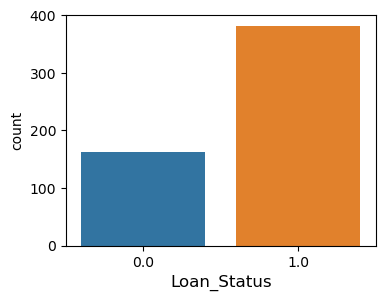

In [203]:
plt.figure(figsize=(4,3))
sns.countplot(data['Loan_Status'])
plt.xlabel('Loan_Status', fontsize=12)
plt.show()

#### Observation : As we can see from the graph the Target column is having imbalance in the data

### # Using Oversampling Method for balancing the data

In [204]:
from imblearn.over_sampling import SMOTE
X=data.drop(['Loan_Status'], axis=1)
y=data['Loan_Status']

sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [205]:
y1.value_counts()

0.0    382
1.0    382
Name: Loan_Status, dtype: int64

#### Now we are having equal samples for data

### # Model buliding

In [206]:
# Importing all other libraries for modeling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [207]:
X=x1
y=y1
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0
1,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0
2,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0
3,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0
4,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0


In [208]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

#### # Test train split

In [209]:
# Random Forest Classifier
rs=0
max_acc=0
for i in range(300):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy > max_acc:
        max_acc=accuracy
        rs=i
print("Max accuracy score : ", max_acc, "   , at Random state : ", rs)

Max accuracy score :  0.9057591623036649    , at Random state :  56


In [210]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=rs)
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
123,1.000000,1.0,2.0,0.0,0.0,11757.000000,0.0,187.000000,180.000000,1.0,2.000000
294,1.000000,1.0,1.0,0.0,1.0,9833.000000,1833.0,182.000000,180.000000,1.0,2.000000
256,1.000000,1.0,2.0,0.0,0.0,4400.000000,0.0,127.000000,360.000000,0.0,1.000000
744,1.000000,0.0,0.0,0.0,0.0,2457.713826,0.0,82.338313,401.933218,1.0,1.650557
155,1.000000,1.0,1.0,0.0,0.0,6400.000000,7250.0,180.000000,360.000000,0.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
465,1.000000,1.0,2.0,0.0,1.0,17500.000000,0.0,400.000000,360.000000,1.0,0.000000
440,1.000000,1.0,0.0,1.0,0.0,2600.000000,1700.0,107.000000,360.000000,1.0,0.000000
134,1.000000,1.0,1.0,0.0,0.0,6000.000000,0.0,160.000000,360.000000,1.0,0.000000
181,0.000000,0.0,0.0,0.0,0.0,10000.000000,0.0,214.000000,360.000000,1.0,1.000000


In [211]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfc_y_pred=rf.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,rfc_y_pred)* 100,' %' )
print("\n confusion_matrix  : \n", confusion_matrix(y_test,rfc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,rfc_y_pred))

accuracy_score : 90.57591623036649  %

 confusion_matrix  : 
 [[88 14]
 [ 4 85]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.96      0.86      0.91       102
         1.0       0.86      0.96      0.90        89

    accuracy                           0.91       191
   macro avg       0.91      0.91      0.91       191
weighted avg       0.91      0.91      0.91       191



In [212]:
#Support Vector Classifier
svc=SVC()
svc.fit(x_train, y_train)
svc_y_pred=svc.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,svc_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,svc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,svc_y_pred))

accuracy_score : 54.45026178010471  %

 confusion_matrix  : 
 [[23 79]
 [ 8 81]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.74      0.23      0.35       102
         1.0       0.51      0.91      0.65        89

    accuracy                           0.54       191
   macro avg       0.62      0.57      0.50       191
weighted avg       0.63      0.54      0.49       191



In [213]:
#Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_y_pred=gb.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,gb_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,gb_y_pred))
print("\n classification_report  : \n", classification_report(y_test,gb_y_pred))

accuracy_score : 88.48167539267016  %

 confusion_matrix  : 
 [[84 18]
 [ 4 85]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       102
         1.0       0.83      0.96      0.89        89

    accuracy                           0.88       191
   macro avg       0.89      0.89      0.88       191
weighted avg       0.89      0.88      0.88       191



In [214]:
#AdaBoost Classifier
ab=AdaBoostClassifier()
ab.fit(x_train, y_train)
ab_y_pred=ab.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,ab_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,ab_y_pred))
print("\n classification_report  : \n", classification_report(y_test,ab_y_pred))

accuracy_score : 84.29319371727748  %

 confusion_matrix  : 
 [[82 20]
 [10 79]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.89      0.80      0.85       102
         1.0       0.80      0.89      0.84        89

    accuracy                           0.84       191
   macro avg       0.84      0.85      0.84       191
weighted avg       0.85      0.84      0.84       191



In [215]:
#Bagging Classifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)
bag_y_pred=bag.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,bag_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,bag_y_pred))
print("\n classification_report  : \n", classification_report(y_test,bag_y_pred))

accuracy_score : 84.81675392670157  %

 confusion_matrix  : 
 [[92 10]
 [19 70]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       102
         1.0       0.88      0.79      0.83        89

    accuracy                           0.85       191
   macro avg       0.85      0.84      0.85       191
weighted avg       0.85      0.85      0.85       191



In [216]:
#Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_y_pred=et.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,et_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,et_y_pred))
print("\n classification_report  : \n", classification_report(y_test,et_y_pred))


accuracy_score : 89.52879581151832  %

 confusion_matrix  : 
 [[89 13]
 [ 7 82]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       102
         1.0       0.86      0.92      0.89        89

    accuracy                           0.90       191
   macro avg       0.90      0.90      0.90       191
weighted avg       0.90      0.90      0.90       191



In [217]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,lr_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,lr_y_pred))
print("\n classification_report  : \n", classification_report(y_test,lr_y_pred))


accuracy_score : 79.58115183246073  %

 confusion_matrix  : 
 [[69 33]
 [ 6 83]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.92      0.68      0.78       102
         1.0       0.72      0.93      0.81        89

    accuracy                           0.80       191
   macro avg       0.82      0.80      0.79       191
weighted avg       0.82      0.80      0.79       191



#### So, the best accuracy scores is 90.57 % with 'Random Forest Classifier'

### # Cross validation score

In [218]:
from sklearn.model_selection import cross_val_score

In [222]:
#Cross validation for Random forest classifier
cv_score = cross_val_score(rf,X,y,cv=7,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Random forest classifier : ', (accuracy_score(y_test,rfc_y_pred)-cv_score.mean()))

[0.75454545 0.70642202 0.78899083 0.96330275 0.94495413 0.95412844
 0.96330275] 

Average CV Score 86.79494817109496   %
difference in score Random forest classifier :  0.03780968059271539


In [223]:
#Cross validation for support vector classifier
cv_score = cross_val_score(svc,X,y,cv=7,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score support vector classifier : ', (accuracy_score(y_test,svc_y_pred)-cv_score.mean()))

[0.48181818 0.5412844  0.50458716 0.51376147 0.51376147 0.55045872
 0.52293578] 

Average CV Score 51.83724532348386   %
difference in score support vector classifier :  0.026130164566208536


In [224]:
#Cross validation for Gradient Boosting classifier
cv_score = cross_val_score(gb,X,y,cv=7,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Gradient Boosting classifier :  ', (accuracy_score(y_test,gb_y_pred)-cv_score.mean()))

[0.7        0.66972477 0.76146789 0.94495413 0.96330275 0.93577982
 0.91743119] 

Average CV Score 84.18086500655308   %
difference in score Gradient Boosting classifier :   0.04300810386117082


In [225]:
#Cross validation for AdaBoost classifier
cv_score = cross_val_score(ab,X,y,cv=7,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score AdaBoost classifier : ', (accuracy_score(y_test,ab_y_pred)-cv_score.mean()))

[0.65454545 0.68807339 0.74311927 0.93577982 0.94495413 0.90825688
 0.87155963] 

Average CV Score 82.08983676873586   %
difference in score AdaBoost classifier :  0.022033569485416238


In [227]:
#Cross validation for Bagging classifier
cv_score = cross_val_score(bag,X,y,cv=7,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Bagging classifier : ', (accuracy_score(y_test,bag_y_pred)-cv_score.mean()))

[0.77272727 0.71559633 0.7706422  0.94495413 0.88073394 0.83486239
 0.88990826] 

Average CV Score 82.9917788633385   %
difference in score Bagging classifier :  0.018249750633630768


In [228]:
#Cross validation for Extratree classifier
cv_score = cross_val_score(et,X,y,cv=7,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Extratree classifier : ', (accuracy_score(y_test,et_y_pred)-cv_score.mean()))

[0.74545455 0.69724771 0.78899083 0.9266055  0.89908257 0.93577982
 0.89908257] 

Average CV Score 84.17490766114621   %
difference in score Extratree classifier :  0.053538881503721214


In [231]:
#Cross validation for Logistic Regression
cv_score = cross_val_score(et,X,y,cv=7,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Linear Regression : ', (accuracy_score(y_test,lr_y_pred)-cv_score.mean()))

[0.73636364 0.72477064 0.77981651 0.9266055  0.90825688 0.94495413
 0.9266055 ] 

Average CV Score 84.9624687239366   %
difference in score Linear Regression :  -0.053813168914758736


#### Average Cross Val score for ' Bagging classifier ' is  82.99 % and difference in score for Prediction done earlier and avg CV score for ' Bagging classifier ' is 0.018 or 1.8% 

#### Observation:
1. the least differenc in earlier prediction and average cv score is minimum for 'Bagging Classifier' while having Score of 82.99%
2. the highest avgrage cv score is 86.79 % for 'Random Forest Classifier' with difference in earlier prediction and avg cv score is :  0.037 or 3.7 %

----------------------------------------------------------------------------------------------------------------  

#### #so taking the highest Avg CV score in consideration we select 'Random Forest Classifier' as our final model as if we remove the 3.7% difference in accuracy still score is higher than 'Bagging Classifier'

### # Hyper Parameter Tuning

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
params={'n_estimators': [100, 200, 300],
    'criterion':['gini', 'entropy', 'log_loss'],  
    'min_samples_leaf':[1, 2, 4],
    'min_samples_split' : [2, 4, 6],
    'n_jobs': [-2,-1,None],
    'max_features': ['sqrt','log2', None]}

In [235]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=3)

In [236]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300],
                         'n_jobs': [-2, -1, None]})

In [237]:
print('Best Score  : ',grid_search.best_score_)
print('\nBest Parameters : ', grid_search.best_params_)

Best Score  :  0.8551483420593368

Best Parameters :  {'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -2}


In [239]:
Final_Model=RandomForestClassifier(criterion= 'entropy', max_features= None, min_samples_leaf= 1, min_samples_split=2, n_estimators= 100, n_jobs=-2)
Final_Model.fit(x_train,y_train)
y_pred=Final_Model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of the model is :  ', accuracy*100," %" )

accuracy of the model is :   89.52879581151832  %


### # Confusion Matrix

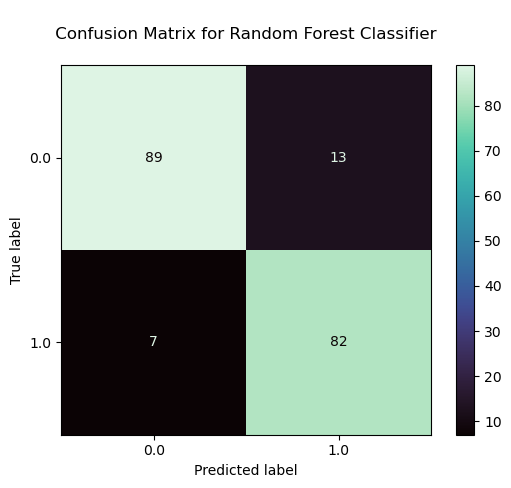

In [243]:
from sklearn import metrics

class_names = data.columns
metrics.plot_confusion_matrix(Final_Model.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\n Confusion Matrix for Random Forest Classifier \n')
plt.show()

In [244]:
#saving the model
import pickle
pickle.dump(Final_Model, open('Loan_Application_Status_predication.pkl', 'wb'))

In [250]:
#load model
load_model=pickle.load(open('Loan_Application_Status_predication.pkl', 'rb'))
prediction = load_model.predict(x_test)
prediction

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0.])

In [252]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction

df.sample(10)

,Actual,predicted
703,0.0,0.0
6,0.0,0.0
451,1.0,1.0
613,0.0,0.0
495,1.0,1.0
88,1.0,1.0
321,1.0,1.0
246,0.0,0.0
170,1.0,1.0
82,1.0,1.0
